<a href="https://colab.research.google.com/github/repkazaqy/Tugas_SKO/blob/main/Tubes_SKO_Repka_Mochamad_Zaqy_Mulyadi(1101184183).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS BESAR SISTEM KOMUNIKASI OPTIK**  
Nama  : Repka Mochamad Zaqy Mulyadi  
NIM   : 1101184183  
Kelas : TT-42-07

In [2]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

**KETERANGAN ANALISIS PERHITUNGAN**

*   Diketahui sebuah gedung di daerah Kopo, Bandung memiliki **40 lantai**.
*   Jarak gedung tersebut dari Sentral di **STO Lembong, Bandung adalah 12 km (sampai ONU)**. Lantai yang dihitung adalah **lantai 24**, jarak
yang ditempuh sampai ke Roset di lantai tersebut **ditambah 96 meter**. Maka total jaraknya yaitu **12.096 Km atau 12096 meter.**
*   Panjang gelombang yang diketahui adalah **1490 nm** dengan redaman **0,28 db/Km.**
*   Total ada **6 Connector, 2 Splitter,** dan **8 Splicer.**
*   Untuk Splitter, masing-masing memiliki redaman. Splitter pertama memiliki redaman sebesar **16.37 dB** (Splitter 1:4) dan yang kedua memiliki redaman sebesar **18,28 db** (Splitter 1:8).
*   Untuk Splicer nya memiliki redaman sebesar **0,1 dB.**
*   Angka lain berhubungan dengan ketetapan yang diambil dari jurnal atau *paper* yang dijadikan referensi.








**PARAMETER**

In [4]:
#PARAMETER UNTUK DAYA TERIMA
j = np.arange(1.096,12.096,1)
loss_fiber = 0.28 * j
ptrans = 4

#Splicer
splicer = 8
loss_splicer = 0.1 * 8

#Connector
connector = 6
loss_connector = 0.3 * 6

#Splitter
splitter1 = 16.37
splitter2 = 18.28
loss_splitter = 16.37 + 18.28

In [5]:
#PARAMETER UNTUK SIGNAL TO NOISE RATIO (SNR)
responsivitas = 0.85
dtsinyal = -0.23
loss_margin = 3
muatan = 1.6*10**-19
arusgelap = 2*10**-7
BW = 8*10**9
noise_figure = 1
kboltzman = 1.38*10**-23
tmp = 290
RL = 50 

In [6]:
#PENGKONVERSIAN
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

**HASIL ANALISIS (FUNGSI & GRAFIK) TERLAMPIR**

In [7]:
#FUNGSI DAYA TERIMA
def dayaterima(ptrans,j,loss_fiber,splicer,loss_splicer,connector,loss_connector,loss_splitter,loss_margin):
  RT = loss_fiber + loss_splicer + loss_connector + loss_splitter + loss_margin
  preceive = ptrans - RT
  return preceive
preceive = dayaterima(ptrans,j,loss_fiber,splicer,loss_splicer,connector,loss_connector,loss_splitter,loss_margin)
print ("Daya Terima =",preceive)

Daya Terima = [-36.55688 -36.83688 -37.11688 -37.39688 -37.67688 -37.95688 -38.23688
 -38.51688 -38.79688 -39.07688 -39.35688]


SNR = [28.6245128 28.0645128 27.5045128 26.9445128 26.3845128 25.8245128
 25.2645128 24.7045128 24.1445128 23.5845128 23.0245128]


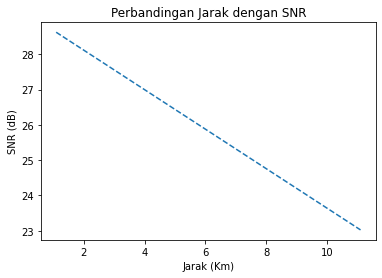

In [10]:
#FUNGSI SIGNAL NOISE TO RATIO

#Arus primer
def arusprimer(preceive):
  preceive_num = LtN(preceive)
  iprimer = preceive_num * responsivitas
  return iprimer
iprimer = arusprimer(preceive)

#BDC
def bdc(muatan,arusgelap,BW,dtsinyal,noise_figure):
  BDC = 2*muatan*arusgelap*BW*dtsinyal*dtsinyal*noise_figure
  return BDC
BDC = bdc(muatan,arusgelap,BW,dtsinyal,noise_figure)

#Shot Noise
def shotnoise(muatan,arusgelap,BW,dtsinyal,noise_figure):
  sn = 2*muatan*arusgelap*BW*dtsinyal*dtsinyal*noise_figure
  return sn
sn = shotnoise(muatan,arusgelap,BW,dtsinyal,noise_figure)

#Noise Thermal
def noisethermal(kboltzman,tmp,BW,RL):
  nt = (4*kboltzman*tmp*BW)/RL
  return nt
nt = noisethermal(kboltzman,tmp,BW,RL)

#SNR (Signal Noise to Ratio)
def snr(BDC,sn,nt,dtsinyal,iprimer):
  SNR = ((iprimer)**2 * dtsinyal**2)/(BDC + sn + nt)
  signr = NtL(SNR) 
  return signr
signr = snr(BDC,sn,nt,dtsinyal,iprimer)
print("SNR =",signr)

#GRAFIK SIGNAL NOISE TO RATIO (SNR)
def grafik_snr():
  plt.figure()
  plt.plot(j,signr,'--')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

grafik_snr()

Q-Faktor = [26.99141422 25.30612449 23.72606086 22.24465324 20.85574173 19.55355107
 18.33266659 17.18801168 16.11482672 15.10864929 14.16529555]


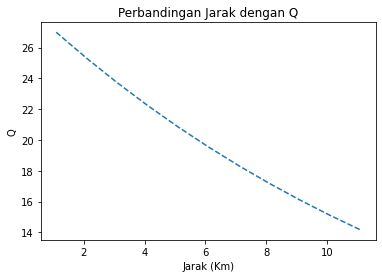

In [9]:
#FUNGSI Q-FAKTOR
def qfaktor(signr):
  qf = 10**(signr/20)
  return qf
QF = qfaktor(signr)
print("Q-Faktor =",QF)

#GRAFIK Q-FAKTOR
def grafik_Q():
  plt.figure()
  plt.plot(j,QF,'--')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

grafik_Q()

BER = [9.33268005e-161 1.36963640e-141 9.72444157e-125 6.36632016e-110
 6.77476724e-097 1.92891577e-085 2.27715583e-075 1.63819193e-066
 1.00746507e-058 7.13190040e-052 7.54875177e-046]


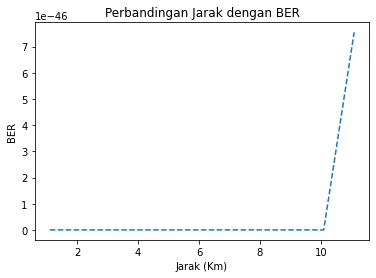

In [11]:
#FUNGSI BER
def ber(QF):
  phi = 3.14159
  BER = (1/(QF*np.sqrt(2*phi)))*(np.exp(-QF**2/2))
  return BER
BER = ber(QF)
print("BER =",BER)

#GRAFIK BER
def grafik_BER():
  plt.figure()
  plt.plot(j,BER,'--')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_BER()

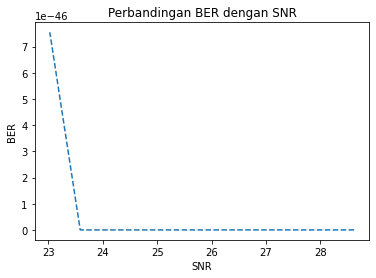

In [12]:
def grafik_perbandingan():
  plt.figure()
  plt.plot(signr,BER,'--')
  plt.title('Perbandingan BER dengan SNR')
  plt.xlabel('SNR')
  plt.ylabel('BER')
  plt.show()

grafik_perbandingan()